<a href="https://colab.research.google.com/github/heauming/heauming/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EC%8B%A4%EC%8A%B5_%EC%8A%A4%ED%83%80%EC%9B%8C%EC%A6%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#한글 폰트 설정하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm !/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,310 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155225 files and d

In [ ]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family = 'NanumBarunGothic') #한글 폰트 가져오기

plt.style.use('seaborn') #그래프 기본 설정
sns.set(font_scale = 1)
import warnings #경고 메시지 무시하기
warnings.simplefilter(action = 'ignore', category = FutureWarning)

In [ ]:
#구글 드라이브 마운트하기
from google.colab import drive
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#데이터 불러오기
sw = pd.read_csv('/content/drive/MyDrive/dataset/Starwars.csv')

In [ ]:
sw.head()

,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species
0,Luke Skywalker,172.0,77.0,blond,fair,blue,19.0,male,masculine,Tatooine,Human
1,C-3PO,167.0,75.0,NaN,gold,yellow,112.0,none,masculine,Tatooine,Droid
2,R2-D2,96.0,32.0,NaN,"white, blue",red,33.0,none,masculine,Naboo,Droid
3,Darth Vader,202.0,136.0,none,white,yellow,41.9,male,masculine,Tatooine,Human
4,Leia Organa,150.0,49.0,brown,light,brown,19.0,female,feminine,Alderaan,Human


In [ ]:
#컬럼 기본 정보 확인하기
sw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        87 non-null     object 
 1   height      81 non-null     float64
 2   mass        59 non-null     float64
 3   hair_color  82 non-null     object 
 4   skin_color  87 non-null     object 
 5   eye_color   87 non-null     object 
 6   birth_year  43 non-null     float64
 7   sex         83 non-null     object 
 8   gender      83 non-null     object 
 9   homeworld   77 non-null     object 
 10  species     83 non-null     object 
dtypes: float64(3), object(8)
memory usage: 7.6+ KB


In [ ]:
sw.describe()

,height,mass,birth_year
count,81.000000,59.000000,43.000000
mean,174.358025,97.311864,87.565116
std,34.770429,169.457163,154.691439
min,66.000000,15.000000,8.000000
25%,167.000000,55.600000,35.000000
50%,180.000000,79.000000,52.000000
75%,191.000000,84.500000,72.000000
max,264.000000,1358.000000,896.000000


In [ ]:
#범주형 데이터의 통계치 확인하기
sw.describe(include=np.object)

,name,hair_color,skin_color,eye_color,sex,gender,homeworld,species
count,87,82,87,87,83,83,77,83
unique,87,12,31,15,4,2,48,37
top,Obi-Wan Kenobi,none,fair,brown,male,masculine,Naboo,Human
freq,1,37,17,21,60,66,11,35


In [ ]:
sw.isnull().sum().sum()

105

In [ ]:
#범주형 데이터 칼럼 안에는 어떤 내용이 들어있을까?
print('Hair_color: ', sw['hair_color'].unique())
...etc

Hair_color:  ['blond' nan 'none' 'brown' 'brown, grey' 'black' 'auburn, white'
 'auburn, grey' 'white' 'grey' 'auburn' 'blonde' 'unknown']


In [ ]:
#데이터 내용 간단히 정리해서 출력하기
print("총 데이터 개수: ", sw.shape[0] * sw.shape[1])
print("총 결측치 수: {} = 전체 데이터의 {:.2f}%".format(sw.isnull().sum().sum(), (sw.isnull().sum().sum() * 100) / (sw.shape[0] *sw.shape[1])))
print("스타워즈에 등장하는 등장인물 수: ", sw['name'].nunique())
print("스타워즈에 등장하는 종족 수: ", sw['species'].nunique())

총 데이터 개수:  957
총 결측치 수: 105 = 전체 데이터의 10.97%
스타워즈에 등장하는 등장인물 수:  87
스타워즈에 등장하는 종족 수:  37


  데이터를 보고 질문 만들기
1. 스타워즈 캐릭터의 성별 비율은?
2. 성별에 따른 캐릭터의 신장 분포는?
3. 가장 무거운 캐릭터와 가장 가벼운 캐릭터는?
4. 스타워즈 캐릭터의 키와 몸무게는 상관관계를 가질까?

# **데이터 정비하기**

(1) 결측치 처리하기

In [ ]:
#null값이 존재하는 컬럼 확인하기
sw.isnull().any(axis = 0)

name          False
height         True
mass           True
hair_color     True
skin_color    False
eye_color     False
birth_year     True
sex            True
gender         True
homeworld      True
species        True
dtype: bool

In [ ]:
#컬럼별로 null값 개수 확인하기
sw.isnull().sum()

name           0
height         6
mass          28
hair_color     5
skin_color     0
eye_color      0
birth_year    44
sex            4
gender         4
homeworld     10
species        4
dtype: int64

In [ ]:
#어떤 컬럼의 결측치를 처리할 것인가?
#hair color, sex, gender, homeworld, species의 경우 개인 특성임으로 다른 값을 넣는 것이 의미없음
#height, mass에서는 결측치를 0으로 처리해보자
sw['height'].fillna(0, inplace = True)
sw['mass'].fillna(0, inplace = True)

In [ ]:
#sex에 none도 있고 NaN도 있다?
print(sw[sw['sex'] == 'none'])
print(sw[sw['sex'].isnull()])

      name  height   mass hair_color  ...   sex     gender  homeworld species
1    C-3PO   167.0   75.0        NaN  ...  none  masculine   Tatooine   Droid
2    R2-D2    96.0   32.0        NaN  ...  none  masculine      Naboo   Droid
7    R5-D4    97.0   32.0        NaN  ...  none  masculine   Tatooine   Droid
21   IG-88   200.0  140.0       none  ...  none  masculine        NaN   Droid
72  R4-P17    96.0    0.0       none  ...  none   feminine        NaN   Droid
84     BB8     0.0    0.0       none  ...  none  masculine        NaN   Droid

[6 rows x 11 columns]
              name  height  mass hair_color  ...  sex gender  homeworld species
36        Ric Oli?   183.0   0.0      brown  ...  NaN    NaN      Naboo     NaN
39   Quarsh Panaka   183.0   0.0      black  ...  NaN    NaN      Naboo     NaN
79       Sly Moore   178.0  48.0       none  ...  NaN    NaN     Umbara     NaN
85  Captain Phasma     0.0   0.0    unknown  ...  NaN    NaN        NaN     NaN

[4 rows x 11 columns]


In [ ]:
#sex = none인 것들은 species가 Droid임으로, 컬럼 내용을 바꿔보자
sw['sex'][(sw['sex'] == 'none')] = 'robot'
print('Sex: ', sw['sex'].unique())

Sex:  ['male' 'robot' 'female' 'hermaphroditic' nan]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# **EDA & Visualization**

(1) 스타워즈 캐릭터의 성별 비율

In [ ]:
#스타워즈 캐릭터의 성비(sex, gender)는?
print(sw['gender'].value_counts())
print(sw['sex'].value_counts())

masculine    66
feminine     17
Name: gender, dtype: int64
male              60
female            16
robot              6
hermaphroditic     1
Name: sex, dtype: int64


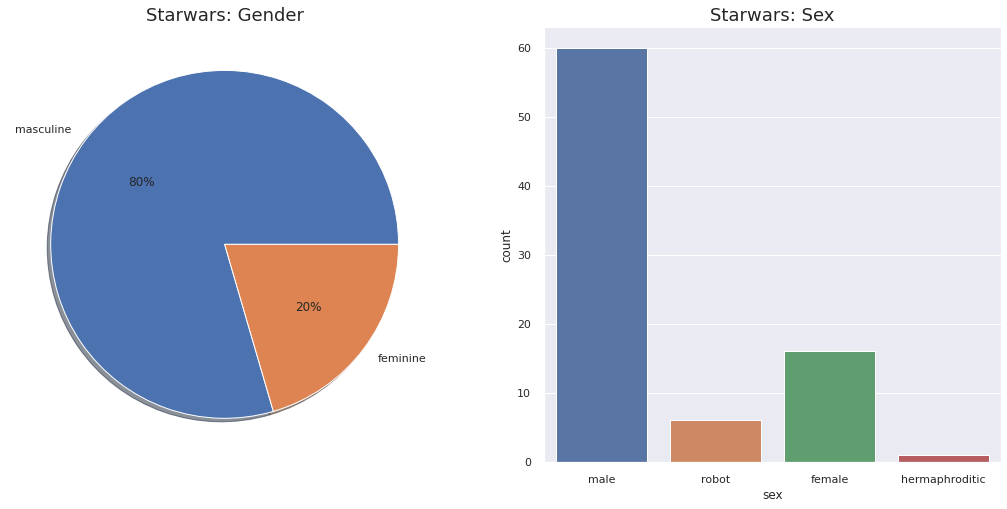

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8)) #figure는 ax를 나타내며 ax는 얼마나 크기의 그래프를 그릴 지 결정
#sns.pieplot
sw['gender'].value_counts().plot.pie(ax = ax[0], autopct = '%1.0f%%', shadow = True) #파이그래프 그리기
ax[0].set_title('Starwars: Gender', size = 18) #그래프 제목
ax[0].set_ylabel('') #y라벨 없애기

#sns.countplot
#항목별 갯수를 세어주는 countplot
#알아서 해당 column을 구성하고 있는 vlaue들을 구분하여 보여준다
sns.countplot(data = sw, x = 'sex', ax = ax[1])
ax[1].set_title('Starwars: Sex', size = 18)

plt.show()

(2) 스타워즈 캐릭터의 성별에 따른 신장 분포

In [ ]:
#스타워즈 캐릭터의 신장 확인하기
#연속형(수치) 데이터의 통계치 확인하기: 최솟값과 최댓값
sw['height'].describe()

count     87.000000
mean     162.333333
std       55.671726
min        0.000000
25%      164.000000
50%      178.000000
75%      190.500000
max      264.000000
Name: height, dtype: float64

In [ ]:
#skewness and kurtosis 구하기
#skewness(왜도) : 데이터가 정규분포에서 얼마나 한 쪽으로 치우쳐져 있는지?
# -3 < skewness < 3 사이의 값이면 기준에 부합한다
#kurtosis(첨도) : 얼마나 뾰족한가(데이터가 얼마나 평균 근처에 몰려있는가?)
# 정규분포의 kurtosis = 0
print('Skewness: %f' % sw['height'].skew())
print('Kurtosis: %f' % sw['height'].kurt())


Skewness: -1.760878
Kurtosis: 2.927697


In [ ]:
#자웅동체(hermaphroditic) 캐릭터는 하나 뿐임으로 확률분포를 구하는 것은 불가능

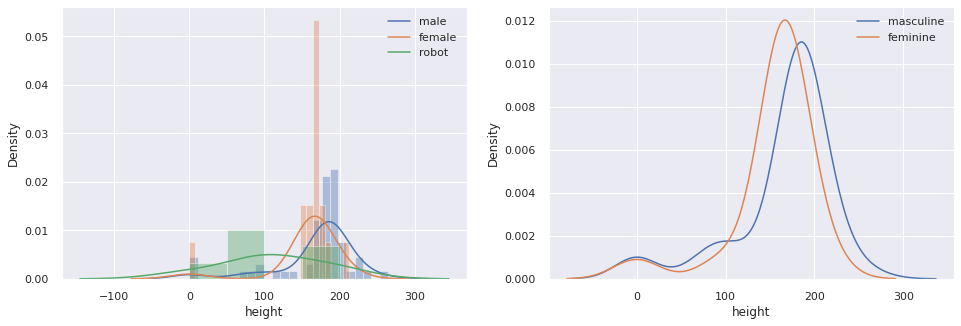

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (16, 5))

#sns.distplot
sns.distplot(sw[sw['sex'] == 'male']['height'], ax = ax[0])
sns.distplot(sw[sw['sex'] == 'female']['height'], ax = ax[0])
sns.distplot(sw[sw['sex'] == 'robot']['height'], ax = ax[0])
ax[0].legend(['male', 'female', 'robot'])

#sns.kdeplot
sns.kdeplot(sw[sw['gender'] == 'masculine']['height'], ax = ax[1])
sns.kdeplot(sw[sw['gender'] == 'feminine']['height'], ax = ax[1])
ax[1].legend(['masculine', 'feminine'])

plt.show()

(3) 가장 가벼운 캐릭터와 가장 무거운 캐릭터

In [ ]:
#몸무게가 가장 가벼운 캐릭터
notz = sw[sw['mass'] != 0]
min(notz['mass'])

15.0

(4) 스타워즈 캐릭터의 종족 간 몸무게 비교

In [ ]:
#groupby로 스타워즈 종족 별 평균 몸무게를 계싼해보자
weight = notz[['species', 'mass']].groupby(by = ['species'], as_index = True).mean()
print(weight)

                       mass
species                    
Aleena            15.000000
Besalisk         102.000000
Cerean            82.000000
Clawdite          55.000000
Droid             69.750000
Dug               40.000000
Ewok              20.000000
Geonosian         80.000000
Gungan            74.000000
Human             82.781818
Hutt            1358.000000
Kaleesh          159.000000
Kaminoan          88.000000
Kel Dor           80.000000
Mirialan          53.100000
Mon Calamari      83.000000
Nautolan          87.000000
Neimodian         90.000000
Pau'an            80.000000
Rodian            74.000000
Skakoan           48.000000
Sullustan         68.000000
Tholothian        50.000000
Togruta           57.000000
Toong             65.000000
Trandoshan       113.000000
Twi'lek           55.000000
Vulptereen        45.000000
Wookiee          124.000000
Yoda's species    17.000000
Zabrak            80.000000


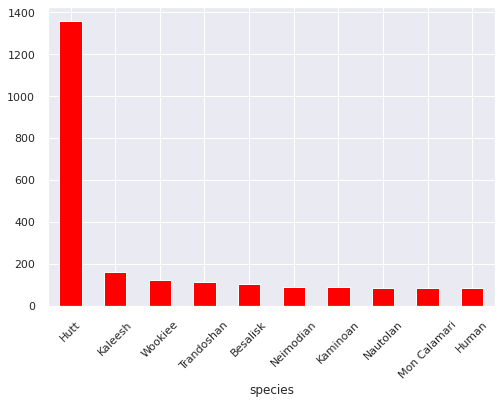

In [ ]:
#몸무게가 많은 순으로 상위 10개 종족을 그래프로 그려보자
weight['mass'].sort_values(ascending = False).head(10).plot.bar(color = 'red')

plt.xticks(rotation = 45)
plt.show()

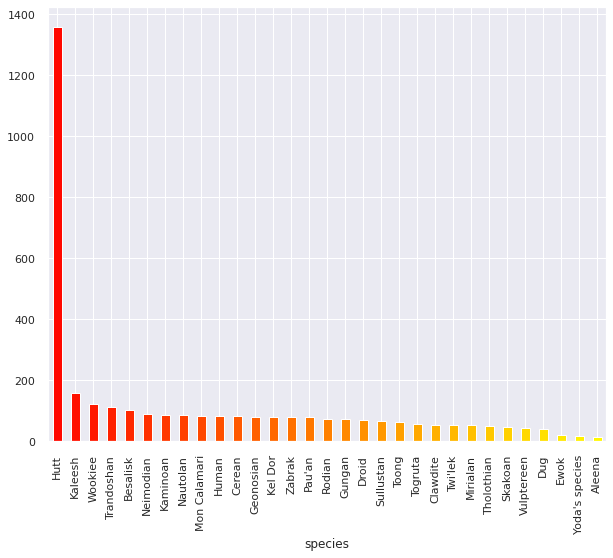

In [ ]:
#스타워즈 종족별 몸무게가 많이 나가는 순으로 그래프를 그려보자
fig, ax = plt.subplots(1, 1, figsize = (10, 8))
colors = sns.color_palette('autumn', len(weight['mass'])) #his라는 컬러팔레트에서 어떤 컬러를 입혀줄지 결정

g = weight['mass'].sort_values(ascending = False).plot.bar(color = colors)
g.set_xticklabels(g.get_xticklabels(), rotation = 90) #라벨을 90도 돌려주기
plt.show()

(5) 스타워즈 캐릭터의 무게 - 키 상관관계

In [ ]:
#Hutt은 몸무게가 너무 outlier 함으로 out시키자
#몸무게가 0인 것도 제외시키자
out1 = sw['species'].isin(['Hutt'])
out2 = sw['mass'].isin(['0'])
sw[-out1][-out2].shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


(58, 11)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


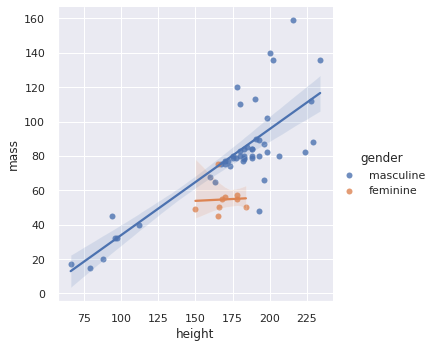

In [ ]:
#두 데이터 사이의 상관관계를 나타내주는 lmplot
#replot은 점만 나타난다

sns.lmplot(data = sw[-out1][-out2], x = 'height', y = 'mass', hue = 'gender') #hue = gender로도 살펴보기
sns.set_style(style = 'darkgrid')
plt.show()